In [1]:
# 초기화

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# 필요한 라이브러리 가져오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# Null data를 쉽게 확인하기 위한 라이브러리, missingno
import missingno as msno
# ignore warnings: 경고가 많기 때문에 이를 무시
import warnings
warnings.filterwarnings('ignore')
# notebook을 실행한 브라우저에서 창을 띄우는 게 아닌 바로 그림을 볼 수 있게
%matplotlib inline

# 1. Dataset 확인

In [3]:
# 데이터 가져오기

df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()
# feature 11개, target 1개

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 Null data check

In [7]:
# Null data check

for col in df_train.columns:
    msg = 'column {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    
# shape는 tuple의 형태로 [0] indexing을 통해 값을 가져와서 분모로 썼다.
# isnull(): null data인가?
# sum(): True = 1, False = 0이기 때문에 null data의 개수를 가져오는 것이 된다.

column PassengerId	 Percent of NaN value: 0.00%
column   Survived	 Percent of NaN value: 0.00%
column     Pclass	 Percent of NaN value: 0.00%
column       Name	 Percent of NaN value: 0.00%
column        Sex	 Percent of NaN value: 0.00%
column        Age	 Percent of NaN value: 19.87%
column      SibSp	 Percent of NaN value: 0.00%
column      Parch	 Percent of NaN value: 0.00%
column     Ticket	 Percent of NaN value: 0.00%
column       Fare	 Percent of NaN value: 0.00%
column      Cabin	 Percent of NaN value: 77.10%
column   Embarked	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg = 'column {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column PassengerId	 Percent of NaN value: 0.00%
column     Pclass	 Percent of NaN value: 0.00%
column       Name	 Percent of NaN value: 0.00%
column        Sex	 Percent of NaN value: 0.00%
column        Age	 Percent of NaN value: 20.57%
column      SibSp	 Percent of NaN value: 0.00%
column      Parch	 Percent of NaN value: 0.00%
column     Ticket	 Percent of NaN value: 0.00%
column       Fare	 Percent of NaN value: 0.24%
column      Cabin	 Percent of NaN value: 78.23%
column   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

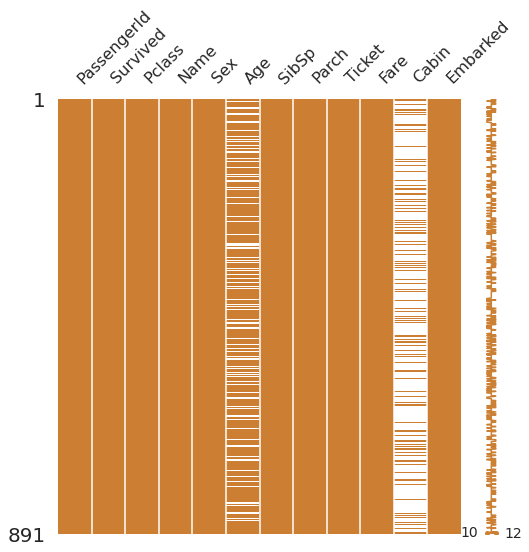

In [9]:
# null data 확인을 위한 missingno를 이용한 시각화

# matrix: 어느 위치에 null data가 존재하는지 분포를 확인 가능
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

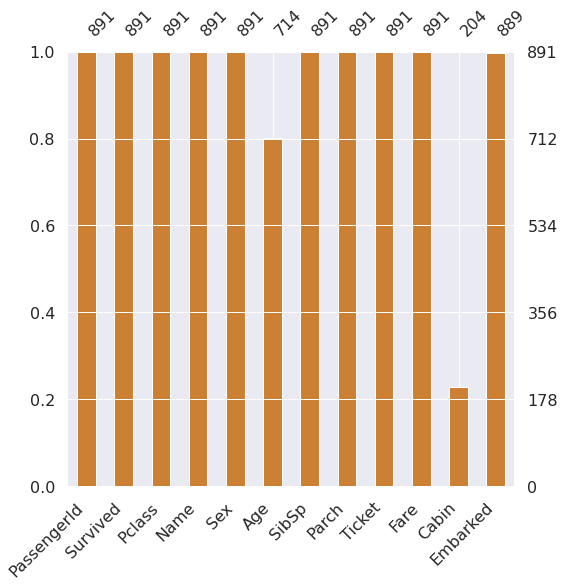

In [10]:
# bar: percent를 확인하여 얼만큼 null data가 많은지를 시각화
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1.2 Target label 확인

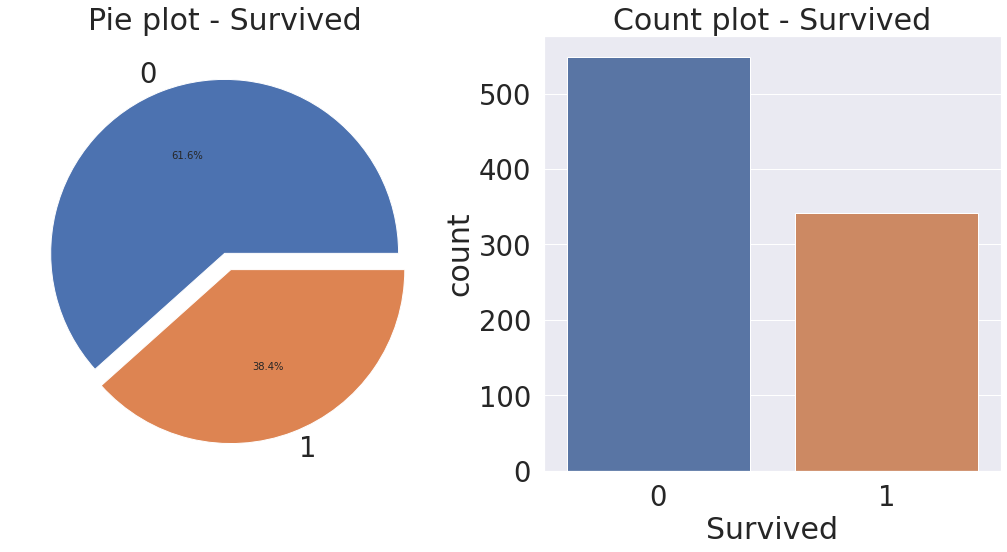

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct='%1.1f%%', ax=axs[0])
axs[0].set_title('Pie plot - Survived')
axs[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=axs[1])
axs[1].set_title('Count plot - Survived')

plt.show()

# 2. EDA(Exploratory Data Analysis)


## 2.1 Pclass

In [12]:
# groupby(), 특정 기준으로 그룹핑할 때 활용
# groupby()를 사용할 때는 반드시 aggregate하는 통계함수와 일반적으로 같이 적용
# as_index: True면 Group Label을 index로 사용

df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).mean()
# Pclass별로 생존률

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [15]:
# crosstab을 이용한 시각화
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

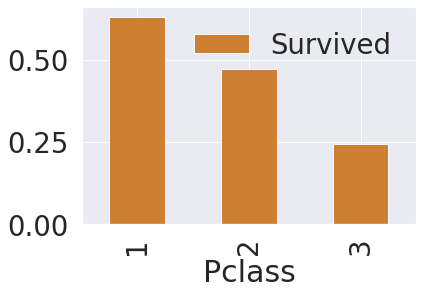

In [16]:
# 생존률을 bar 그래프로 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(color='#CD7F32')

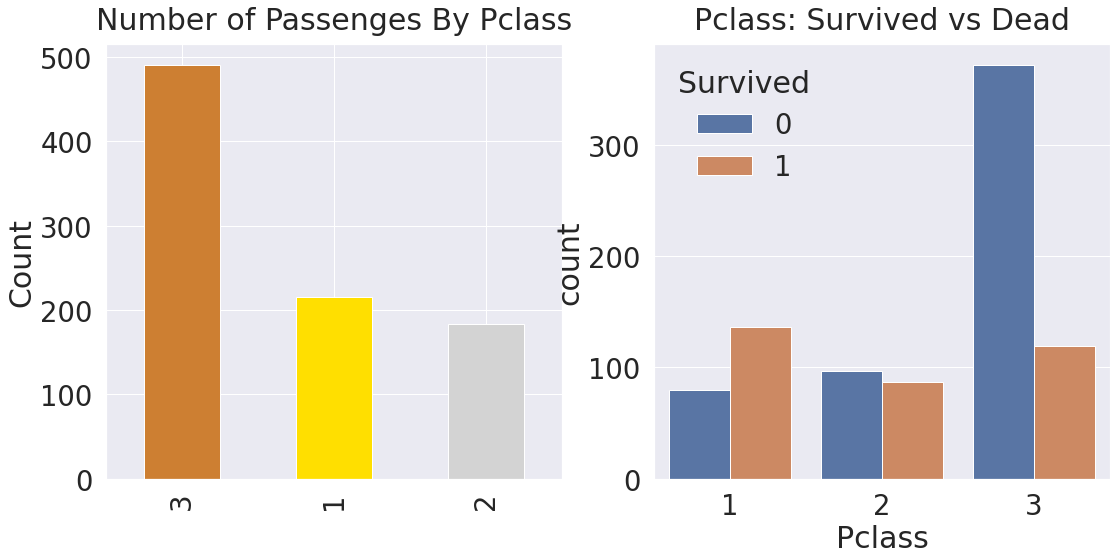

In [17]:
y_position = 1.02
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax = axs[0])
axs[0].set_title('Number of Passenges By Pclass', y=y_position)
axs[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax = axs[1])
axs[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

[Text(0.5, 1.0, 'Test')]

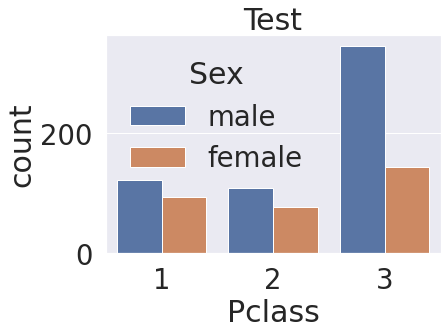

In [18]:
sns.countplot('Pclass', hue='Sex', data=df_train).set(title='Test')

## 2.2 Sex

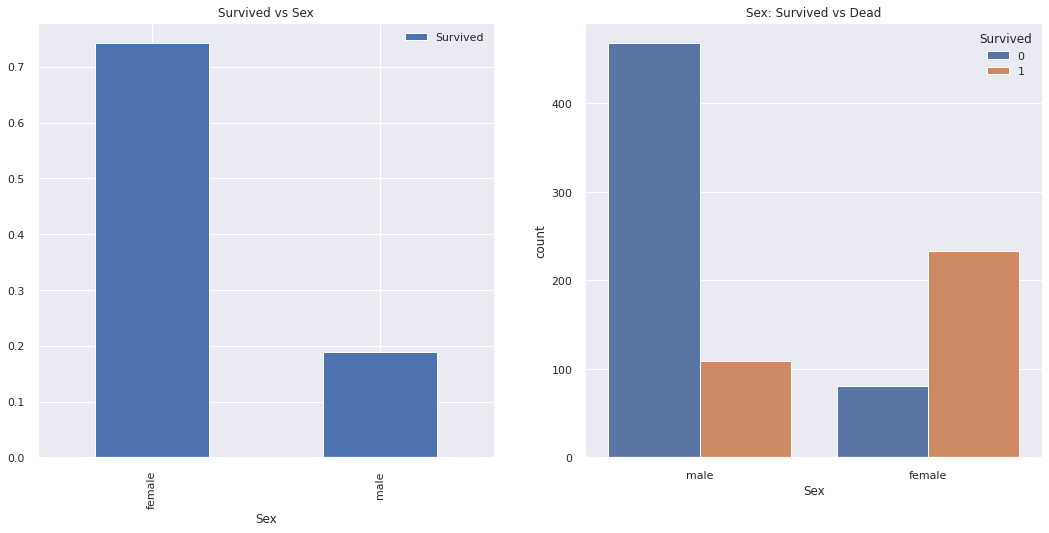

In [19]:
sns.set(rc={'figure.figsize':(10, 5)}) # seaborn 크기 설정
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().plot.bar(ax=axs[0])
axs[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=axs[1])
axs[1].set_title('Sex: Survived vs Dead')
plt.show()

In [20]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

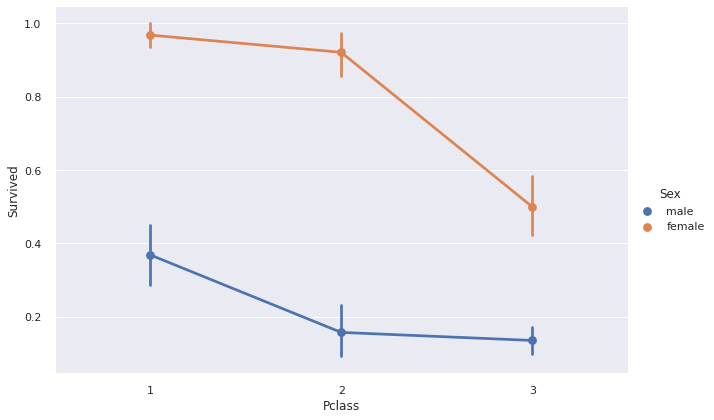

In [22]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train,
              size=6, aspect=1.5)

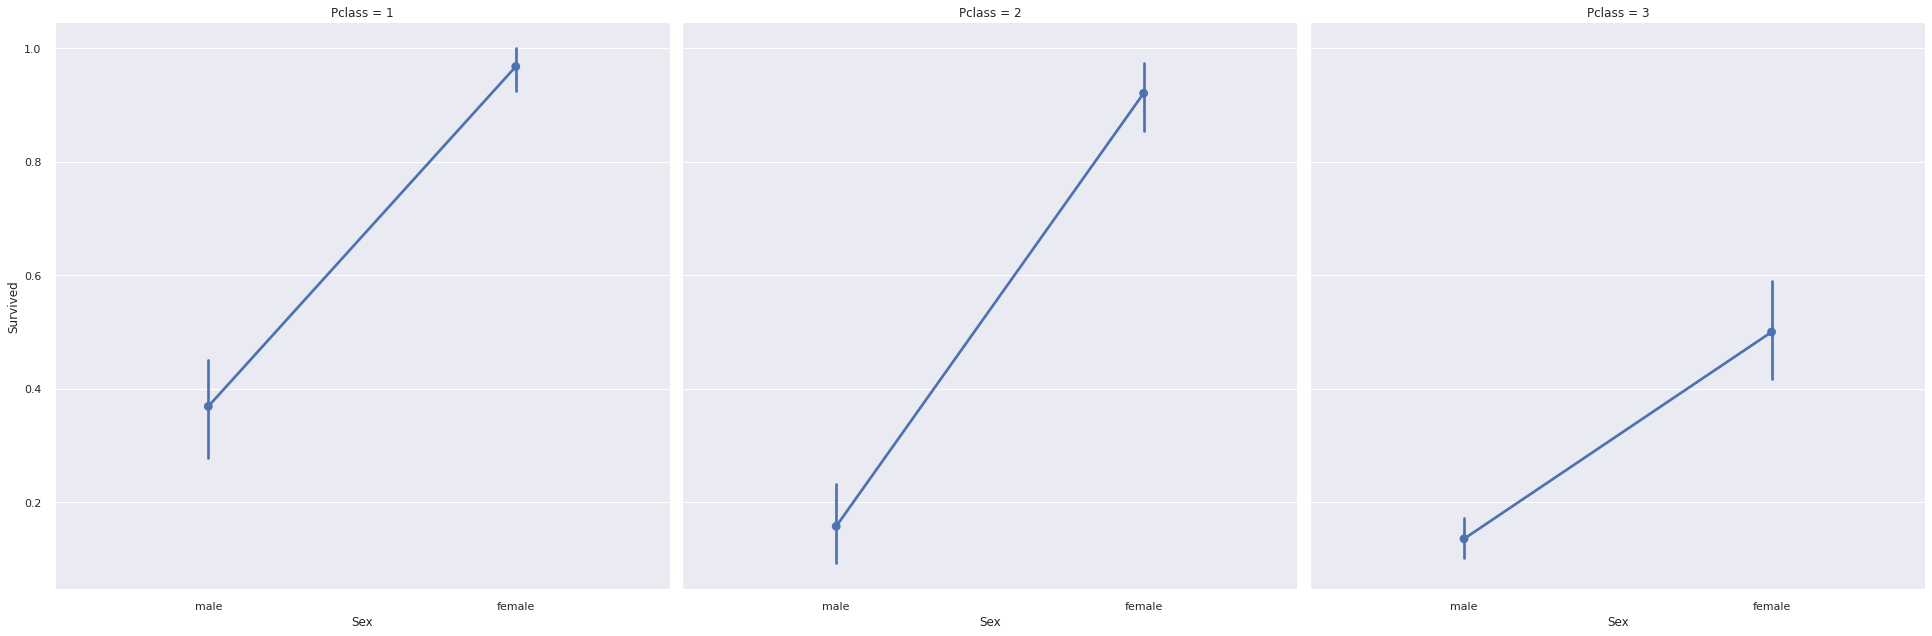

In [23]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, saturation=0.5,
              size=9, aspect=1)

## 2.4 Age

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


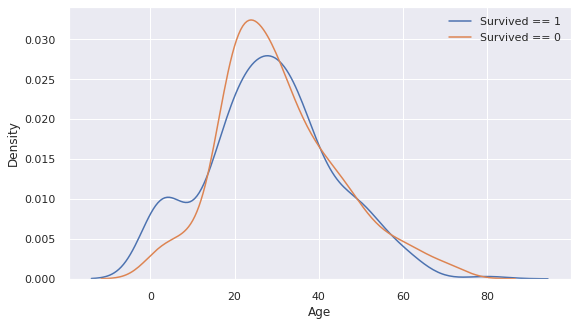

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=axs)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=axs)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

>* 0~10 Age에는 생존자가 이상하게 더 많다.

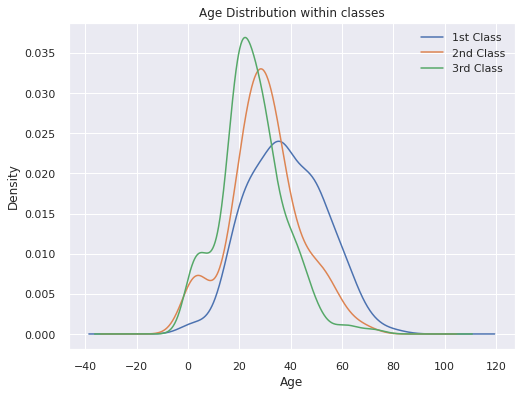

In [26]:
# Age Distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

>* 높은 Class일수록 나이 많은 사람의 비중이 커진다.

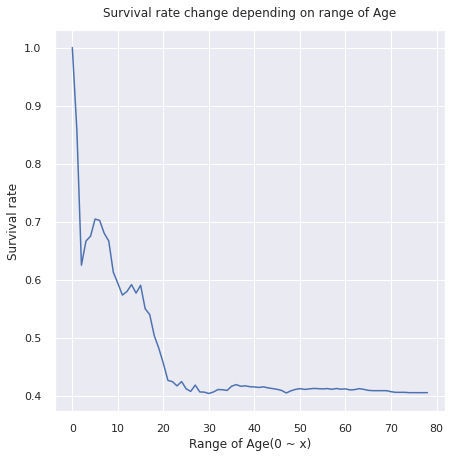

In [27]:
# 나이대가 변하면서 생존률은 어떻게 변하는가
# 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 확인하자
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()
                                   / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0 ~ x)')
plt.show()